## 5.2. Fórmula Interpolatória de Lagrange

Seja $f(x)$ definida em $x_0, x_1,...,x_n$, (n+1) pontos distintos de um intervalo $[a,b]$ e $y_i=f(x_i)$, $i=0,1,...,n$. O polinômio interpolador de Lagrange é dado por 

$$ P(x) = y_0 l_0(x) + y_1 l_1(x) + ...+y_n l_n(x)$$

onde $l_k(x)$, $k=0,1,...,n$ são polinômios de grau $n$ obtidos pela fórmula 

$$ l_k(x)=\frac{(x-x_0)(x-x_1)...(x-x_{k-1})(x-x_{k+1})...(x-x_n)}{(x_k-x_0)(x_k-x_1)...(x_k-x_{k-1})(x_k-x_{k+1})...(x_k-x_n)}$$

ou, de forma compacta

$$P(x)=\sum_{k=0}^{n} y_k l_k(x) $$

com

$$ l_k(x) = \prod_{j=0 e j\neq k}^{n} \frac{(x-x_j)}{(x_k-x_j)}$$

### Exemplo 1

Considere a função $f(x)$ definida nos pontos $\{(0.0, 1.3), (0.5, 2.5), (1.0, 0.9)\}$. Determine o polinômio interpolador, usando a fórmula de Lagrange, e estime $f(0.8)$.

*Solução:* Queremos o polinômio na forma $ P(x) = y_0 l_0(x) + y_1 l_1(x) + y_2 l_2(x)$. Então, obtemos os $l_k(x)$ fazendo

$l_0 = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} = \frac{(x-0.5)(x-1.0)}{(0.0-0.5)(0.0-1.0)} = 
\frac{x^2-1.5x+0.5}{0.5}$

$l_1 = \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}=\frac{(x-0.0)(x-1.0)}{(0.5-0.0)(0.5-1.0)}=\frac{x^2-x}{-0.25}$

$l_2 = \frac{(x-x_1)(x-x_2)}{(x_2-x_1)(x_2-x_2)}=\frac{(x-0.0)(x-0.5)}{(1.0-0.0)(1.0-0.5)}=\frac{x^2-0.5x}{0.5}$

Assim,
$P(x)=1.3 \left(\frac{x^2-1.5x+0.5}{0.5} \right) + 2.5 \left(  \frac{x^2-x}{-0.25} \right) + 0.9 \left( \frac{x^2-0.5x}{0.5} \right) = -5.6x^2+5.2x+1.3$

Portanto, tem-se

$f(0.8) \simeq P(0.8) = -5.6(0.8)^2+5.2(0.8)+1.3 = 1.8760 $.

O script Python abaixo plota o gráfico do polinômio obtido juntamente com os pontos tabelados.

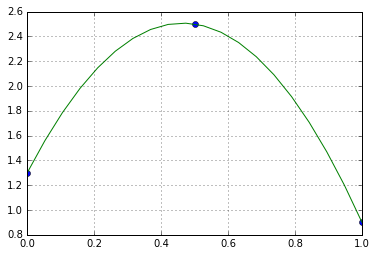

In [3]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = [0.0, 0.5, 1.0]
y = [1.3, 2.5, 0.9]

def f(x): return  -5.6*x**2 + 5.2*x + 1.3

xnew = np.linspace(x[0], x[-1], num=20)
plt.plot(x, y, 'o', xnew, f(xnew),'-')
plt.grid()
plt.show()

Agora, um script Pyhton que implementa a fórmula de Lagrange para o mesmo problema.

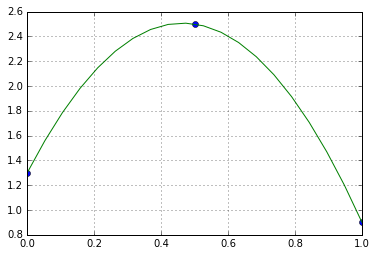

P( 0.8 ) = 1.876


In [13]:
% matplotlib inline
import matplotlib.pyplot as plt

X = [0.0, 0.5, 1.0]
Y = [1.3, 2.5, 0.9]

n = len(Y)

def calculaP(x):
    valor = 0
    for k in range(n):
        lk = 1.0
        for i in range(n):
            if k != i:
                lk = lk*(x - X[i])/(X[k]-X[i])
        valor = valor + Y[k]*lk 
    return valor

Ynew = []
Xnew = np.linspace(X[0], X[-1], num=20)
for xnew in Xnew:
    ynew = calculaP(xnew)
    Ynew.append(ynew)

plt.plot(X, Y, 'o', Xnew, Ynew,'-')
plt.grid()
plt.show()

x = 0.8
print ("P(",x,") =", calculaP(x))